**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Find IRF](#toc2_)    
- 3. [Figures](#toc3_)    
  - 3.1. [Effect on Foreign Economy and Prices](#toc3_1_)    
  - 3.2. [Effect on Production firms, Phillips-curve and Investments](#toc3_2_)    
    - 3.2.1. [Production firms](#toc3_2_1_)    
    - 3.2.2. [Phillips-curve](#toc3_2_2_)    
    - 3.2.3. [Investments](#toc3_2_3_)    
  - 3.3. [National accouting - prices](#toc3_3_)    
  - 3.4. [Import Prices](#toc3_4_)    
  - 3.5. [Labor market](#toc3_5_)    
  - 3.6. [Capital accumulation](#toc3_6_)    
  - 3.7. [Production firms](#toc3_7_)    
  - 3.8. [Phillips curve](#toc3_8_)    
  - 3.9. [Government](#toc3_9_)    
  - 3.10. [Households - aggregate](#toc3_10_)    
  - 3.11. [Households - life-cycle](#toc3_11_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# Export shock - Decomposition

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

C:\Users\nbk863\AppData\Local\Temp\ipykernel_12328\2007051729.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = BabyMAKROModelClass(name='baseline')            #create baseline model

In [3]:
par = model.par                 #set model parameters
ss = model.ss                   #create namespace for steady state
sol = model.sol                 #create namespace for solution

In [20]:
par.t_b = 0
par.delta_B = 0
par.eta = 0.0

## 2. <a id='toc2_'></a>[Find IRF](#toc0_)

In [21]:
Tshock = 50                                             #length of shock
persistence = 0.80**np.arange(Tshock)                   #persistence of shock
shock1 = ['chi']                                        #set shock 1 - shock to chi
shock2 = ['P_F','P_M_C','P_M_G','P_M_I','P_M_X']        #set shock 2 - shock to foreign and import prices
shock_1_size = 0.01                                     #Size of shock 1 (shock 2 is set to half the size of shock 1)
Modellist = model.multi_shock_model(Tshock,persistence,shock_1_size,shock1,0.5*shock_1_size,shock2,constant_wage= True)     #find IRFs for the model containing all shocks - as well as the individual shocks

Jacobian calculated in 27.2 secs
initial:
t1-t0 = 0.01161 secs
it = 3
    max. abs. error = 6.33e-11
    3.95e-13 in A_R_ini_error
    4.80e-14 in Aq_diff
    2.35e-13 in FOC_capital_agency
    2.09e-12 in FOC_K_ell
    6.33e-11 in mkt_clearing
    3.91e-14 in PC

solve: t1-t0 = 0.08265 secs
evaluate + update: t3-t2 = 0.06110 secs
initial:
t1-t0 = 0.02094 secs
it = 3
    max. abs. error = 2.66e-12
    2.22e-14 in A_R_ini_error
    1.78e-15 in Aq_diff
    1.95e-14 in FOC_capital_agency
    1.35e-13 in FOC_K_ell
    2.66e-12 in mkt_clearing
    2.91e-14 in PC

solve: t1-t0 = 0.08976 secs
evaluate + update: t3-t2 = 0.06881 secs
initial:
t1-t0 = 0.02194 secs
it = 3
    max. abs. error = 3.18e-12
    2.67e-13 in A_R_ini_error
    7.55e-15 in Aq_diff
    2.58e-14 in FOC_capital_agency
    1.30e-13 in FOC_K_ell
    3.18e-12 in mkt_clearing
    3.62e-14 in PC

solve: t1-t0 = 0.08301 secs
evaluate + update: t3-t2 = 0.06018 secs


## 3. <a id='toc3_'></a>[Figures](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Effect on Foreign Economy and Prices](#toc0_)

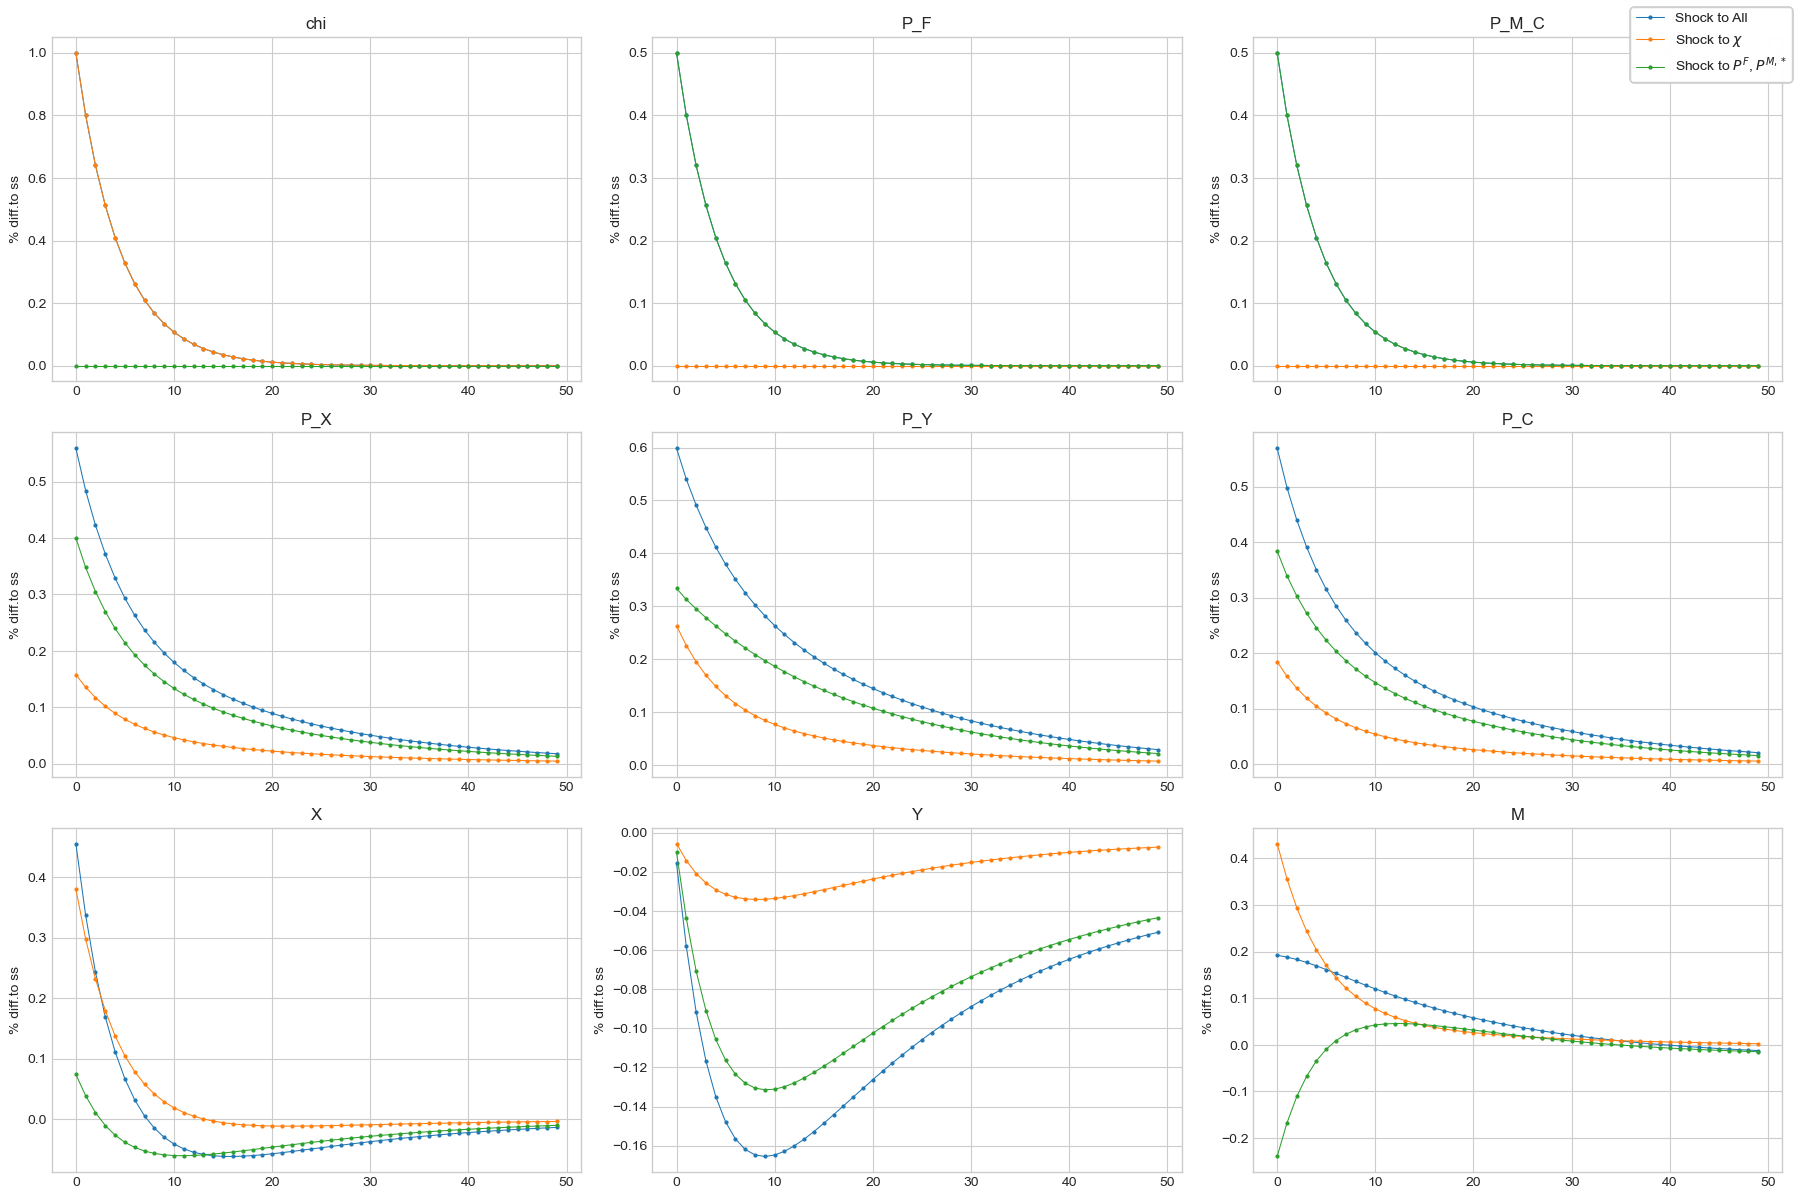

In [22]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['chi','P_F','P_M_C','P_X','P_Y','P_C', 'X', 'Y', 'M'])

### 3.2. <a id='toc3_2_'></a>[Effect on Production firms, Phillips-curve and Investments](#toc0_)

#### 3.2.1. <a id='toc3_2_1_'></a>[Production firms](#toc0_)

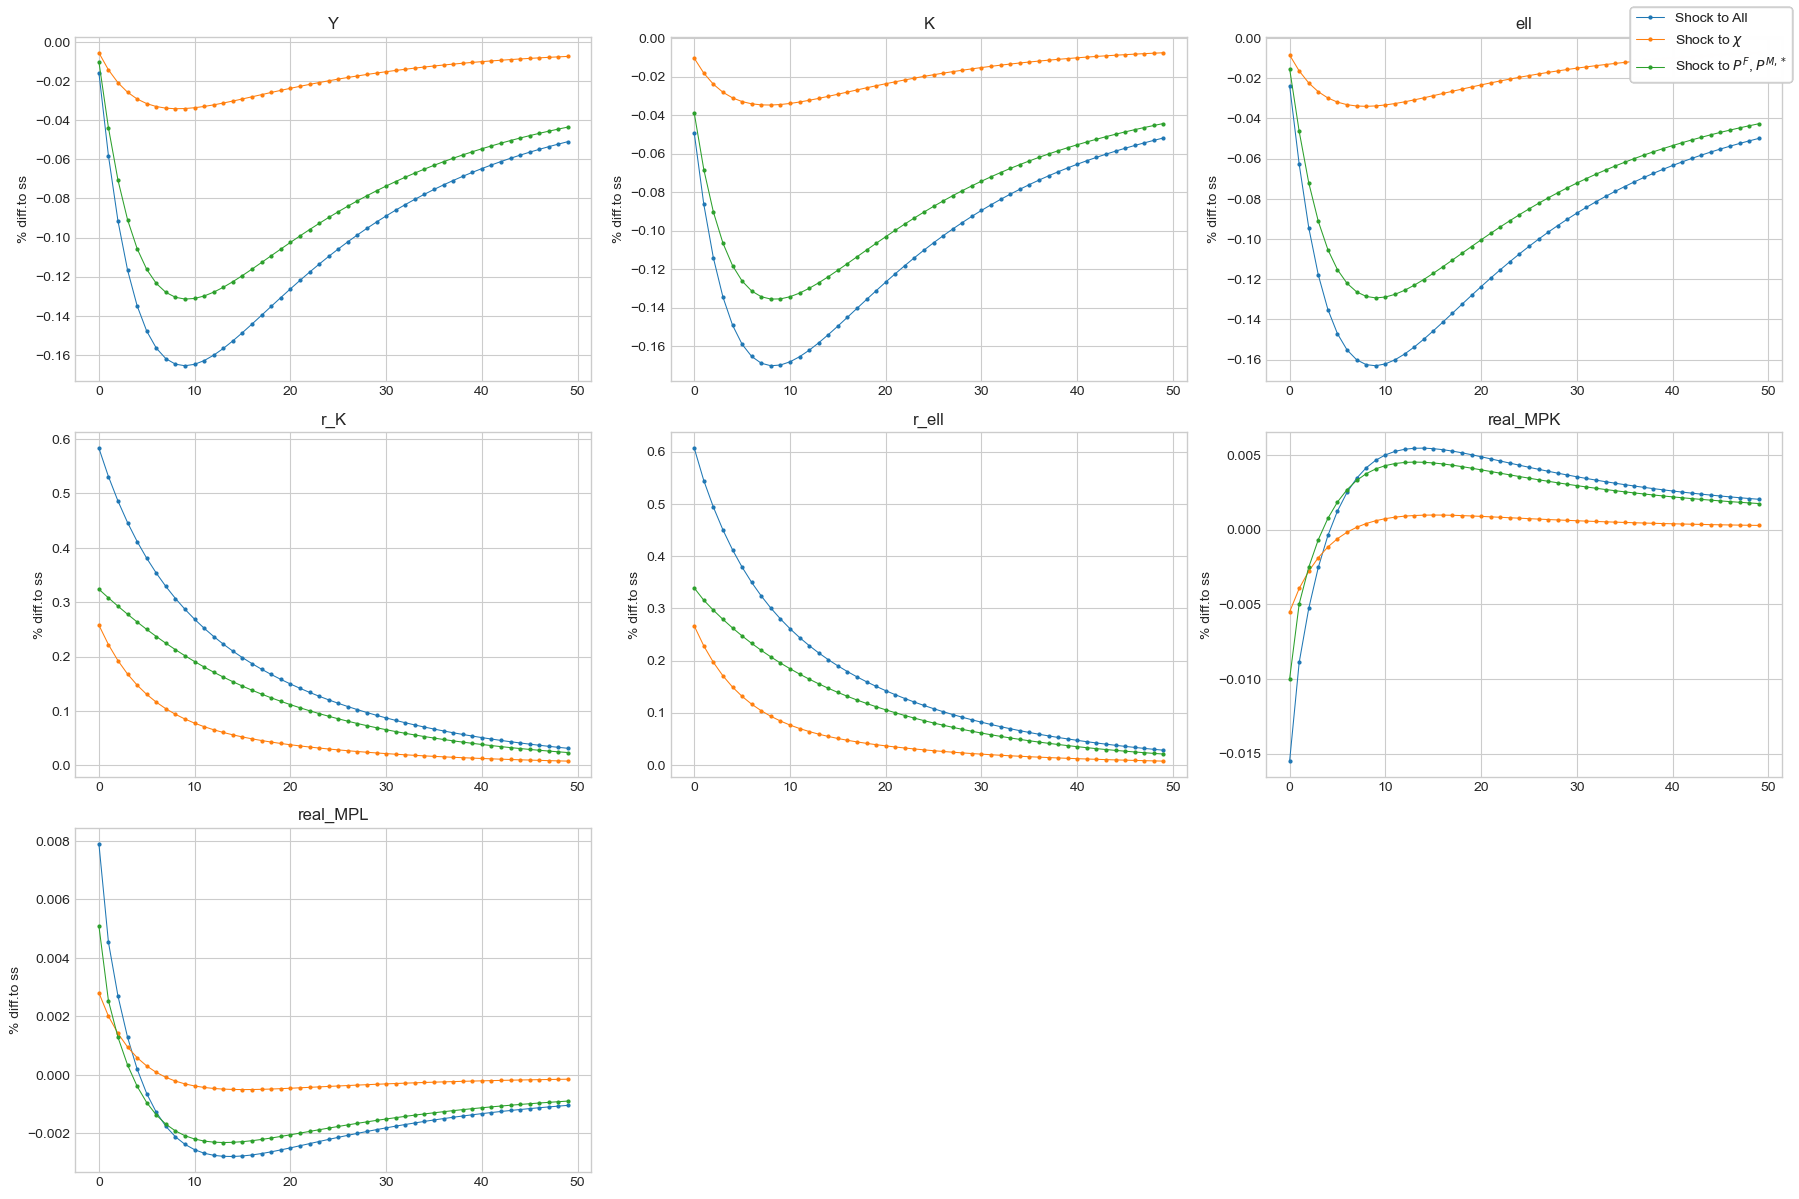

In [23]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['Y','K','ell','r_K','r_ell','real_MPK','real_MPL'])

#### 3.2.2. <a id='toc3_2_2_'></a>[Phillips-curve](#toc0_)

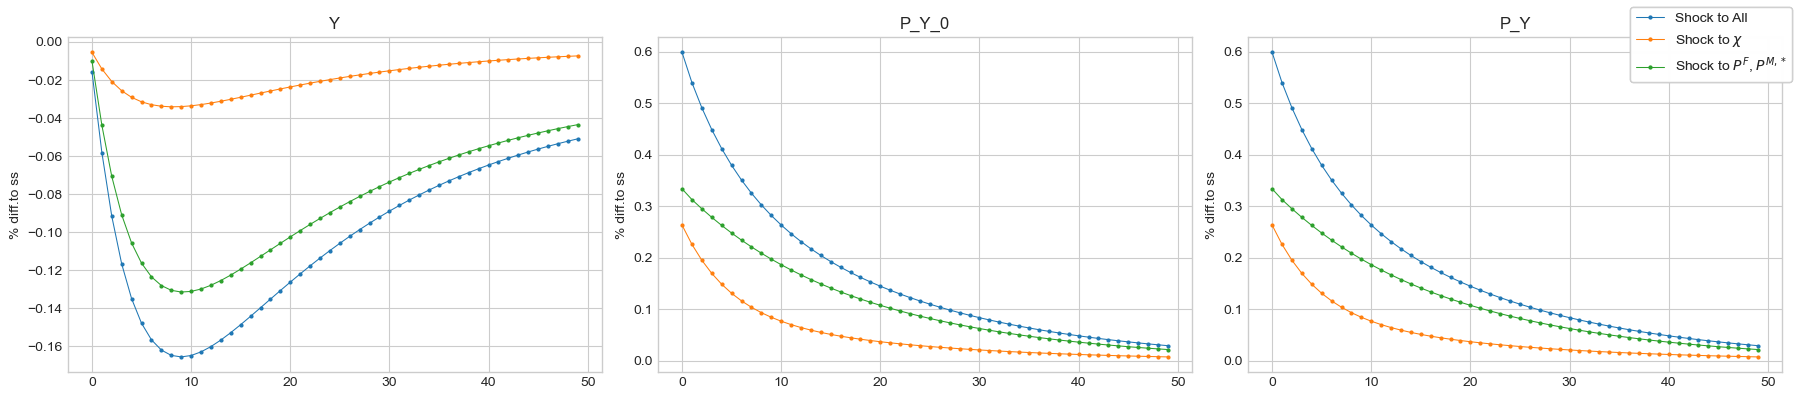

In [24]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['Y','P_Y_0','P_Y'])

#### 3.2.3. <a id='toc3_2_3_'></a>[Investments](#toc0_)

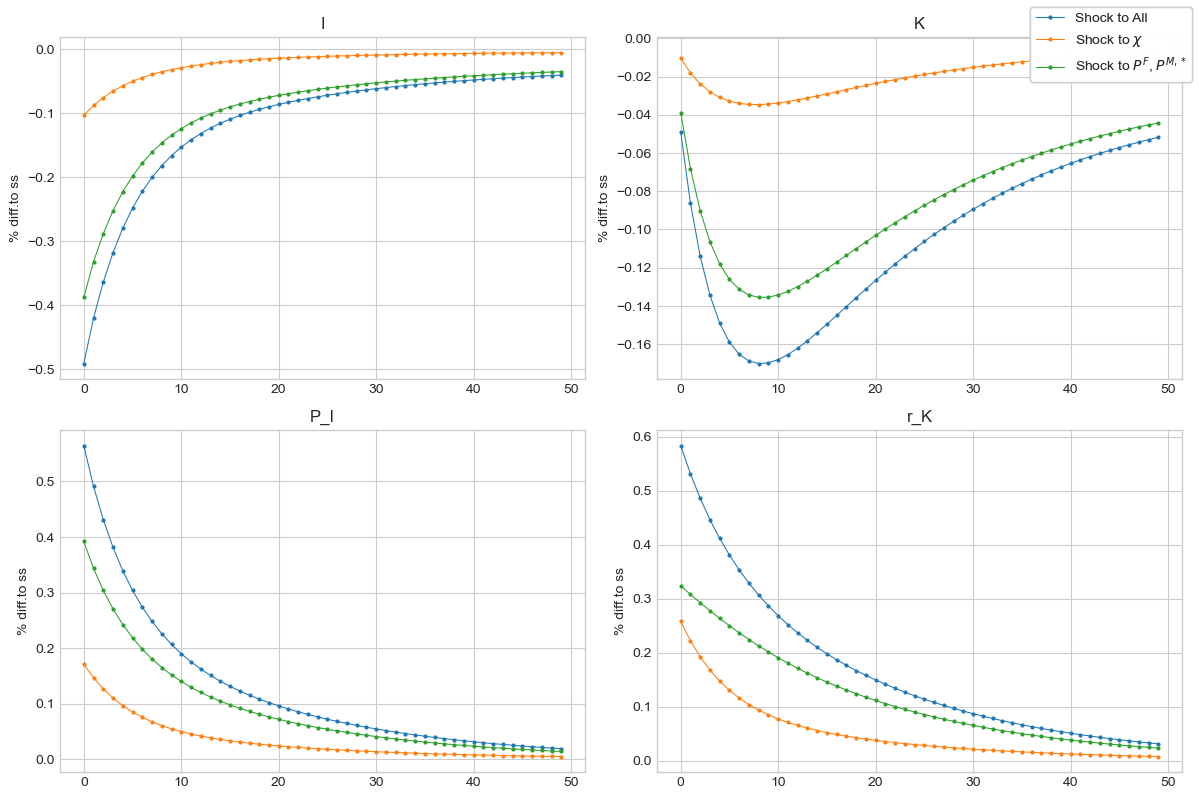

In [25]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['I','K','P_I','r_K'],ncol=2)

### 3.3. <a id='toc3_3_'></a>[National accouting - prices](#toc0_)

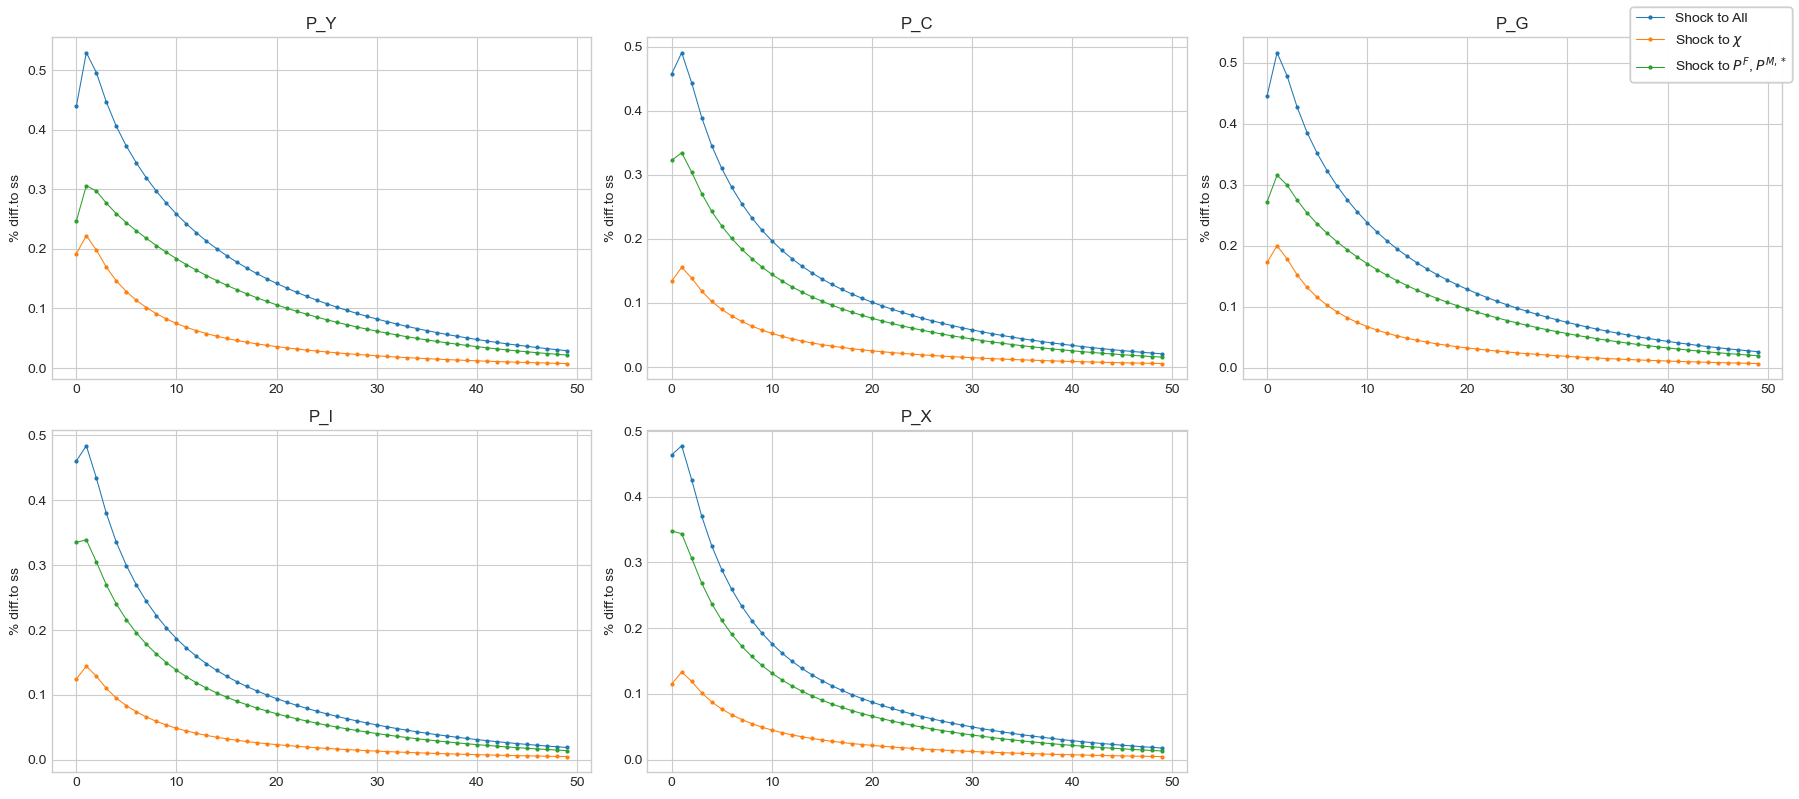

In [10]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['P_Y','P_C','P_G','P_I','P_X'])

### 3.4. <a id='toc3_4_'></a>[Import Prices](#toc0_)

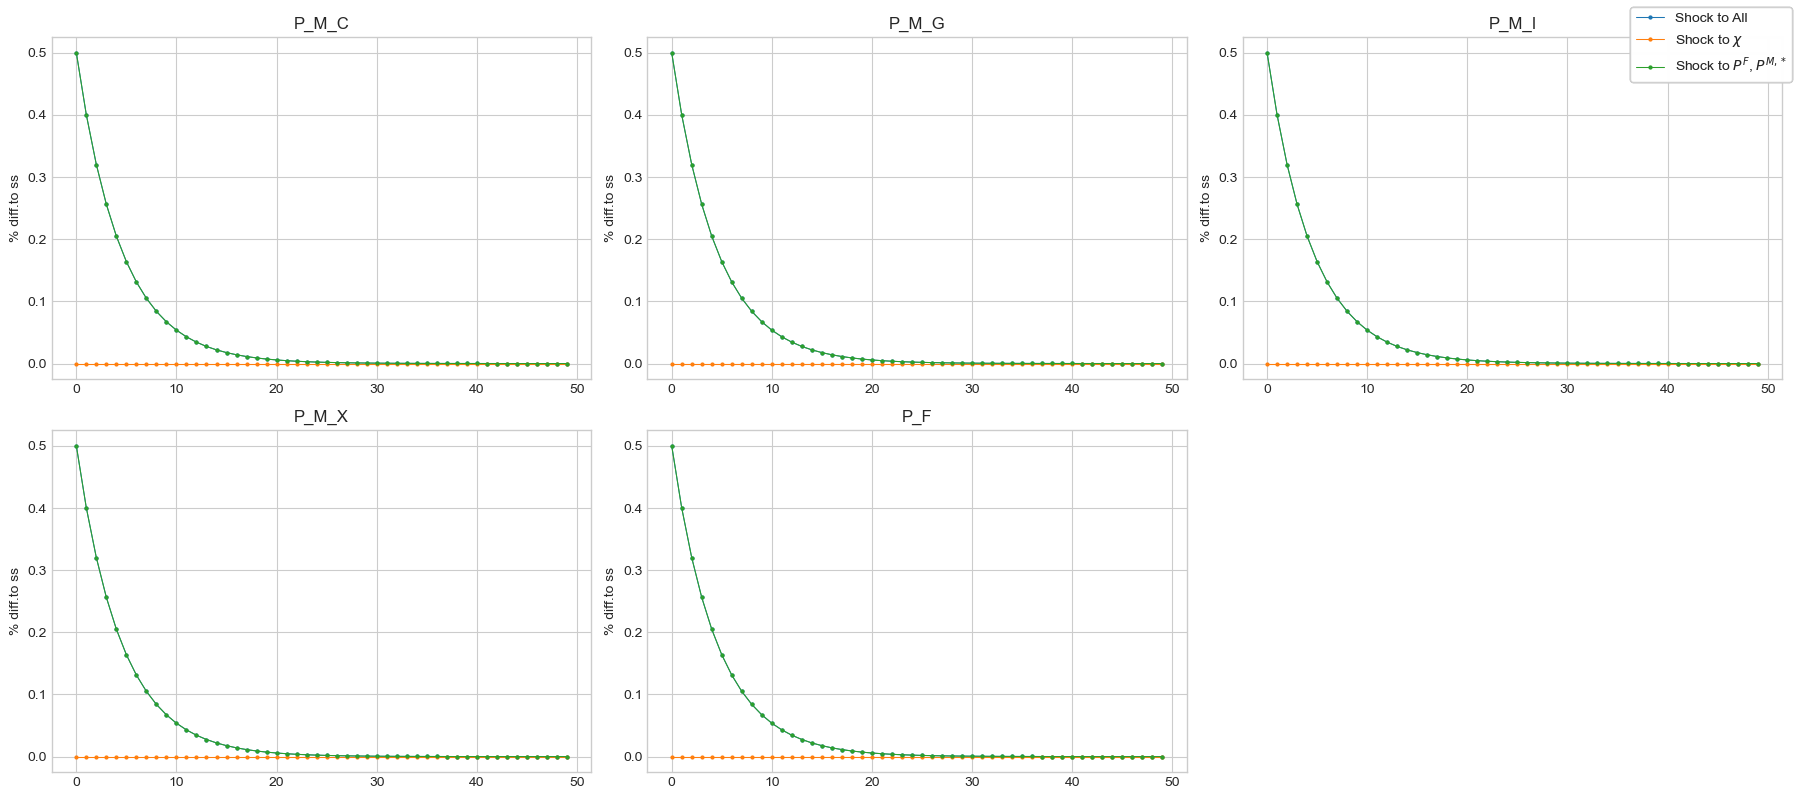

In [11]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['P_M_C','P_M_G','P_M_I','P_M_X','P_F'])

### 3.5. <a id='toc3_5_'></a>[Labor market](#toc0_)

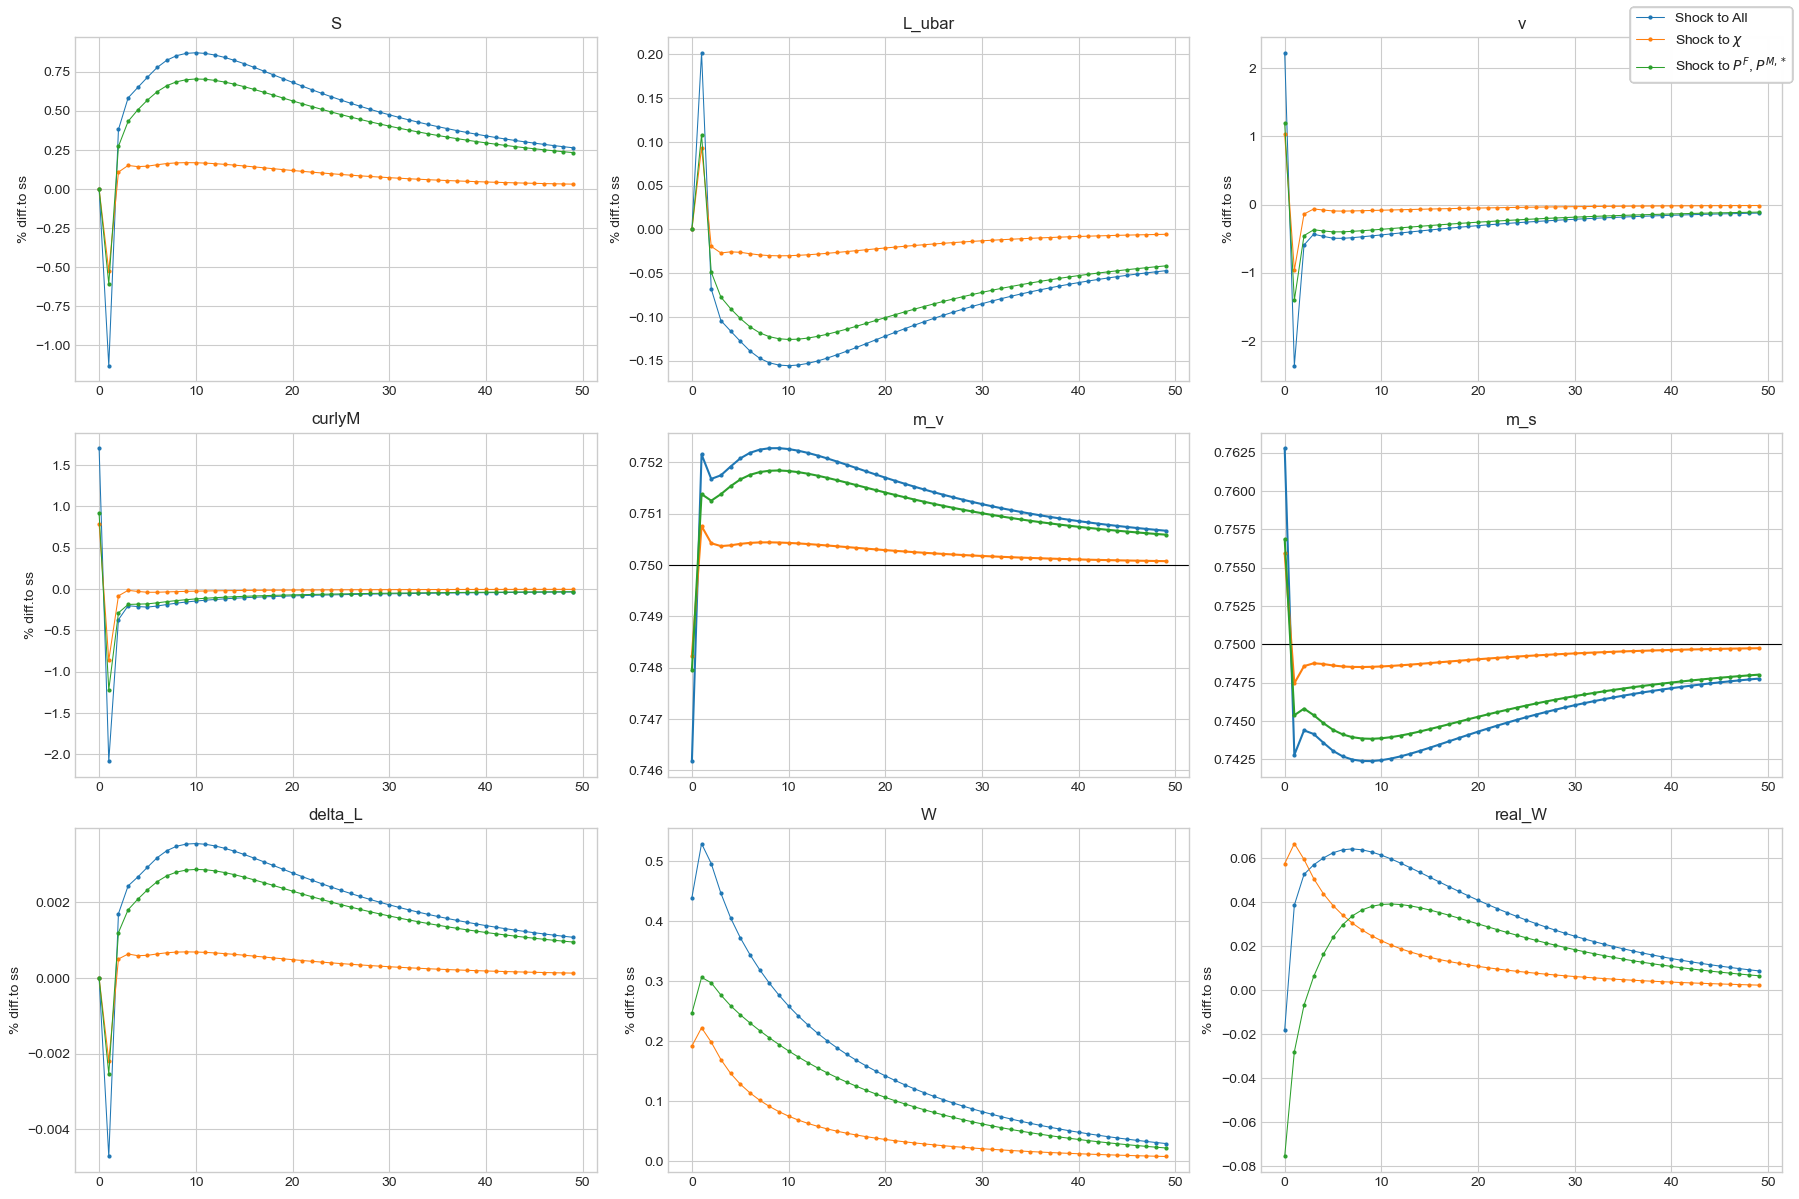

In [12]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['S','L_ubar','v','curlyM','m_v','m_s','delta_L','W','real_W'],abs=['m_v','m_s'])

### 3.9. <a id='toc3_9_'></a>[Government](#toc0_)

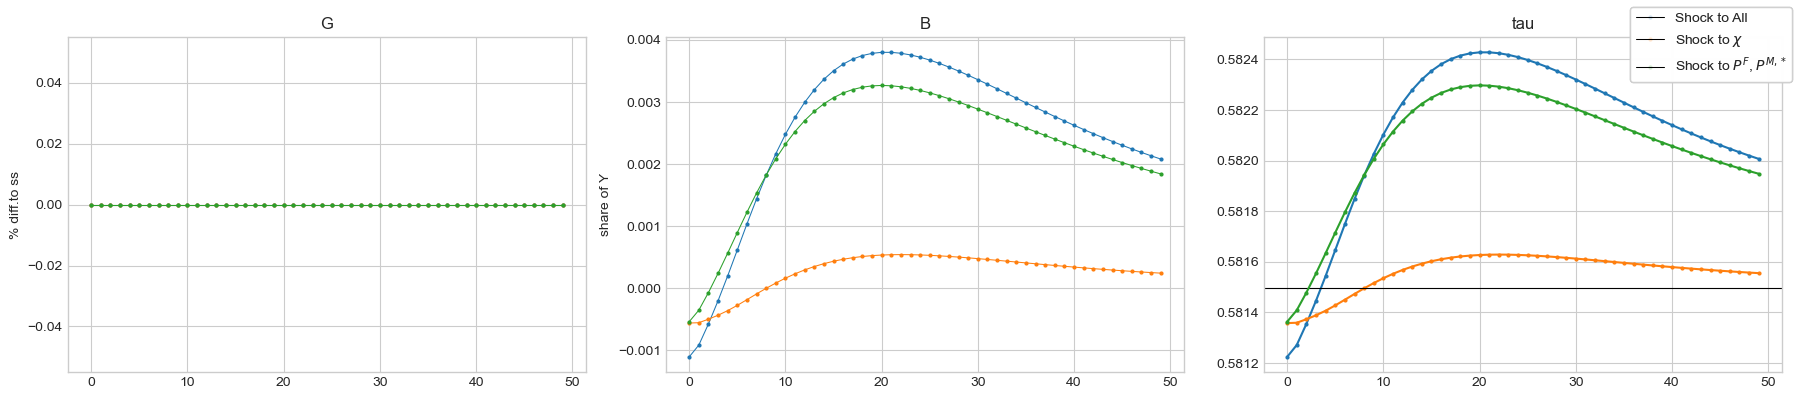

In [16]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['G','B','tau'],abs=['tau'],Y_share=['B'])

### 3.10. <a id='toc3_10_'></a>[Households - aggregate](#toc0_)

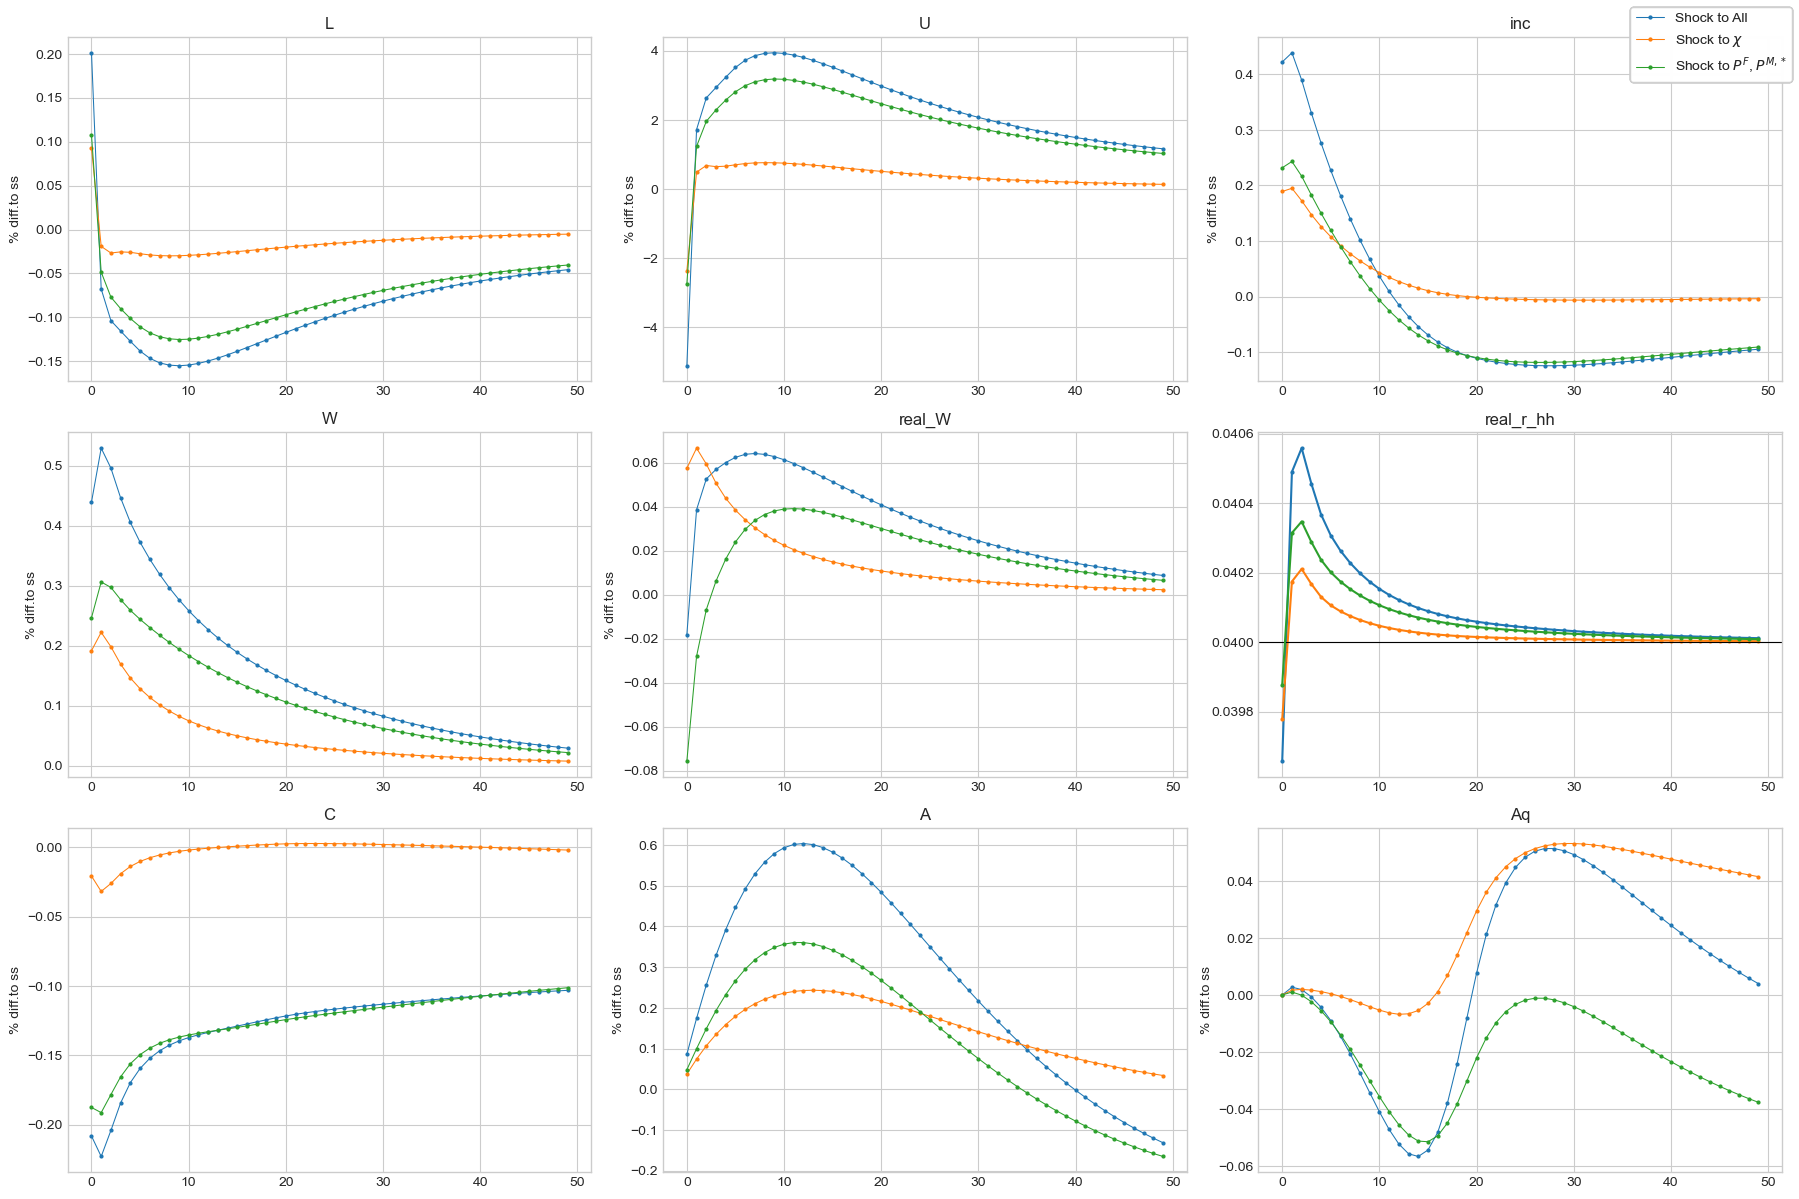

In [17]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['L','U','inc','W','real_W','real_r_hh','C','A','Aq'],ncol=3,abs=['real_r_hh'])

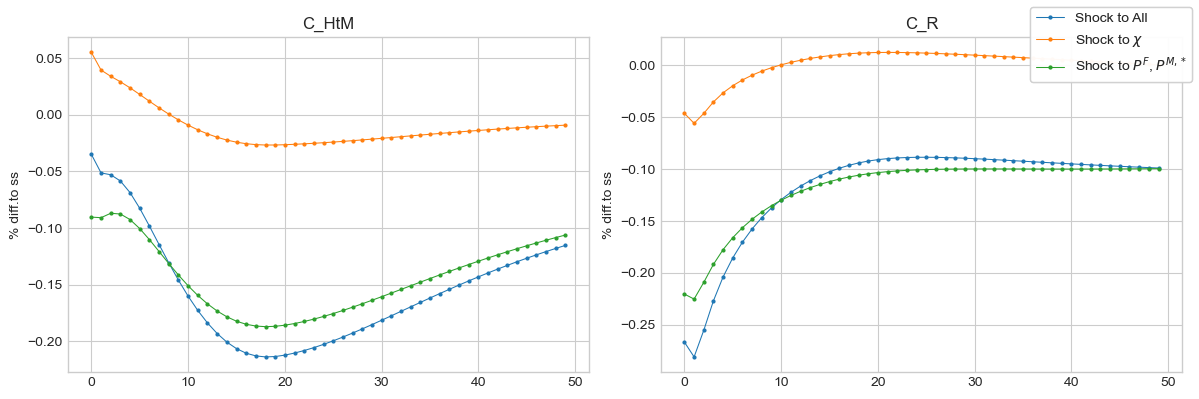

In [18]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['C_HtM','C_R'],ncol=2)

### 3.11. <a id='toc3_11_'></a>[Households - life-cycle](#toc0_)

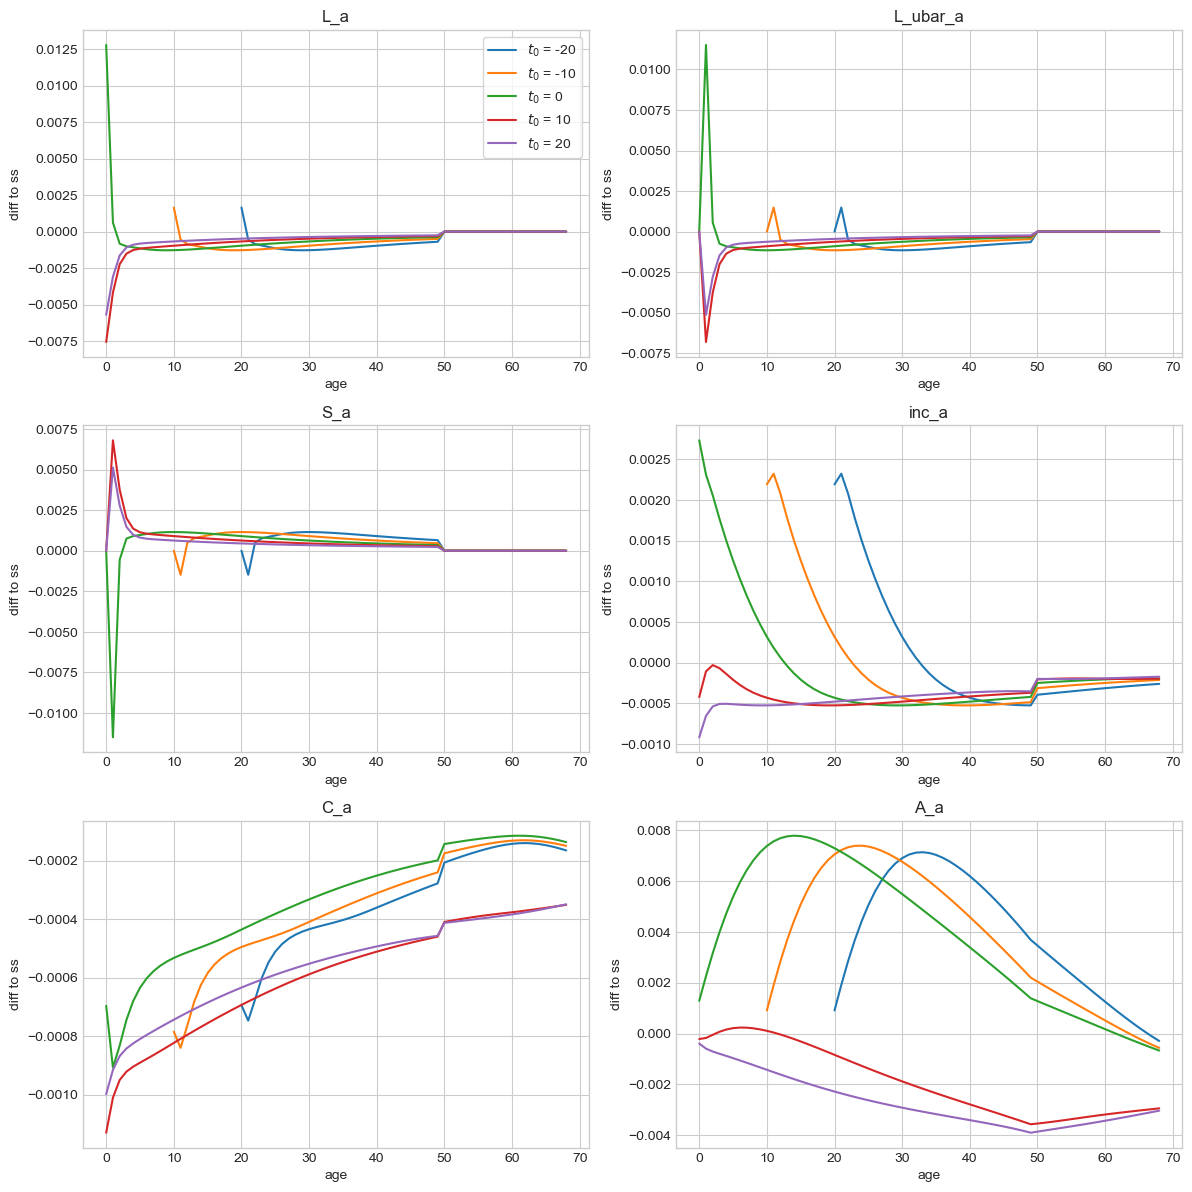

In [19]:
model.plot_IRF_hh(varlist=['L_a','L_ubar_a','S_a','inc_a','C_a','A_a'],t0_list=[-20,-10,0,10,20])